<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/RF_Tungkub_Rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTIMASI ETP DENGAN ALGORITMA RANDOM FOREST**

Data Masukan : Radiasi Matahari


In [19]:
#import library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#load data target dan fitur (Excel)
df = pd.read_excel('/content/Tungkub_Hourly_PM_New.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()


,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-02-13 12:00:02,2023,44,12,29.312,70.219,1,438.1,-0.23786,1.023978,...,1260.465453,193.254701,33.560402,69,247.741287,0.891869,0.364028,h,0.12,m
3,2023-02-13 13:00:02,2023,44,13,29.676,69.697,1.67,375.6,-0.23786,1.023978,...,1256.371338,115.721378,28.75582,69,221.961341,0.799061,0.326147,rc day,69.00,s/m
4,2023-02-13 14:00:02,2023,44,14,28.11,78.695,1.34,323.1,-0.23786,1.023978,...,1252.723978,144.219926,24.783312,69,179.529946,0.646308,0.263799,rc night,690.00,s/m
5,2023-02-13 15:00:02,2023,44,15,26.588,76.712,1,214.4,-0.23786,1.023978,...,1245.78727,193.254701,16.314088,69,121.028726,0.435703,0.177838,Latitude,-8.00,degrees
6,2023-02-13 16:00:02,2023,44,16,27.767,76.011,0.67,210.6,-0.23786,1.023978,...,1242.785238,288.439852,16.06366,69,119.201398,0.429125,0.175153,Longitude,115.00,degrees


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   object 
 5   RH           5561 non-null   object 
 6   U            5561 non-null   object 
 7   Rs           5561 non-null   object 
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [22]:
target_variable = df['ET']
features_variable = df['Rs']

In [23]:
# Split data untuk data fitur dan target
X = features_variable
y = target_variable

#Split data untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150, criterion='squared_error', max_depth =5)

In [25]:
#X_train_reshaped = np.reshape(X_train, (-1, 1))
#print(X_train.shape)
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

#Pelatihan model untuk data training
model.fit(X_train_reshaped, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [26]:
#Prediksi pada data training dan test
x_pred = model.predict(X_train_reshaped)
y_pred = model.predict(X_test_reshaped)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error : {mse: .2f}")
print(f"R-squared: {r2: .2f}")


Mean Squared Error :  0.00
R-squared:  1.00


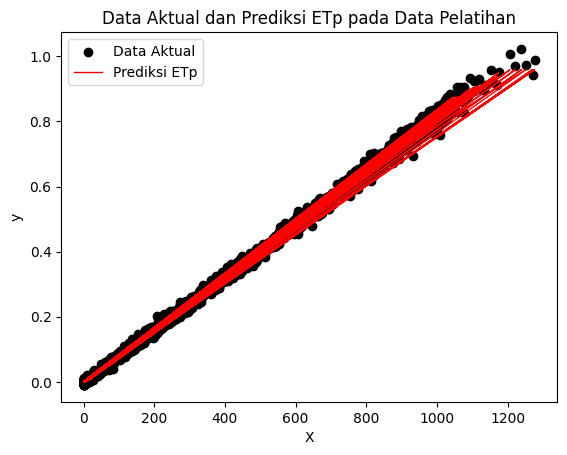

In [27]:
import matplotlib.pyplot as plt
# Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, x_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.title('Data Aktual dan Prediksi ETp pada Data Pelatihan')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


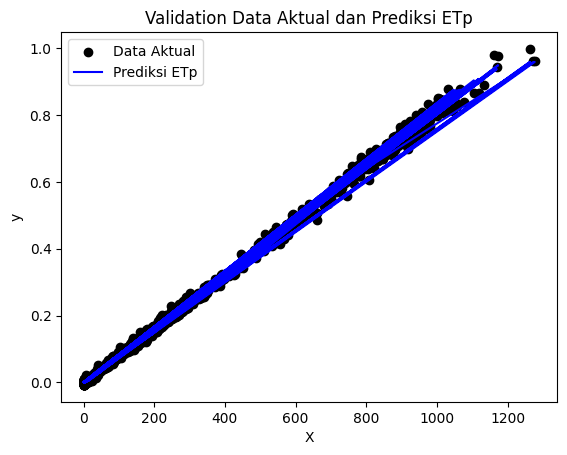

In [28]:
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, y_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()